Latar Belakang

Customer Personality Analysis adalah sebuah analisa mendalam tentang pelanggan yang ideal untuk sebuah perusahaan. Analisa ini dapat membantu perusahaan untuk mengenal pelanggan mereka lebih dan mempermudah mereka untuk modifikasi produk untuk menyesuaikan kebutuhan, perilaku dan tipe pelanggan yang berbeda.



Pernyataan Masalah

Customer Personality Analysis membantu perusahaan untuk memodifikasi produk berdasarkan target pelanggan nya dari segment pelanggan yang berbeda-beda. Contoh, daripada mengeluarkan biaya untuk mempromosikan produk baru ke setiap pelanggan yang ada di dalam database perusahaan, sebuah perusahaan dapat menganalisa segment pelanggan mana yang kemungkinan besar akan membeli produk nya dan lalu melakukan promosi hanya pada segment market tersebut.

Data

Untuk menganalisa permasalahan yang ada, kita akan mencoba untuk menganalisa data pelanggan yang sudah di kumpulkan oleh perusahaan. Data set dapat di akses di sini https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

Dataset ini berisikan informasi tentang data-data pelanggan seperti edukasi, tanggal lahir, status pernikahan dan pemasukan. Ada 10 kolom di dataset marketing_campaign, yaitu:

ID: Nomor unik pelanggan
Year_Birth: Tanggal lahir pelanggan
Education: Tingkat edukasi pelanggan
Marital_Status: Status pernikahan pelanggan
Income: Pemasukan tahunan rumah tangga pelanggan
Kidhome: Jumlah anak di rumah pelanggan
Teenhome: Jumlah remaja di rumah pelanggan
Dt_Customer: Tanggal pelanggan mendaftar ke perusahaan
Recency: Jumlah hari sejak pelanggan membeli produk perusahaan
Complain: 1 bila pelanggan memiliki keluhan di 2 tahun terakhir, 0 bila tidak ada
MntWines: Jumlah yang di habiskan untuk wine di 2 tahun terakhir
MntFruits: Jumlah yang di habiskan untuk buah di 2 tahun terakhir
MntMeatProducts: Jumlah yang di habiskan untuk daging di 2 tahun terakhir
MntFishProducts: Jumlah yang di habiskan untuk ikan di 2 tahun terakhir
MntSweetProducts: Jumlah yang di habiskan untuk permen di 2 tahun terakhir
MntGoldProds: Jumlah yang di habiskan untuk emas di 2 tahun terakhir
NumDealsPurchases: Jumlah pembelian menggunakan discount
AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 bila tidak
AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye kedua, 0 bila tidak
AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ketiga, 0 bila tidak
AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye keempat, 0 bila tidak
AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye kelima, 0 bila tidak
Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 bila tidak
NumWebPurchases: Jumlah pembelian yang di lakukan dari website perusahaan
NumCatalogPurchases: Jumlah pembelian dengan menggunakan katalog
NumStorePurchases: Jumlah pembelian langsung dari toko
NumWebVisitsMonth: Jumlah pengunjung wesite perusahaan

Berikut 5 baris teratas dan terbawah dari dataset marketing_campaign.

In [46]:
df=pd.read_csv('C:\Purwadika\marketing_campaign.csv', sep = "\t")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Data Understanding and Cleaning

Sebelum kita masuk ke dalam analisis yang lebih dalam, kita harus mengenali dataset yang ada dan masuk ke dalam tahap data understanding. Dari proses ini, di harapkan kita dapat menemukan anomali-anomali yang ada di data set kita dan menemukan data yang harus kita bersihkan atau biasa di sebut dengan data cleaning. Untuk menemukan anomali nya mari kita lihat dari informasi yang ada di marketing_campaign.

In [47]:
print(f'Jumlah row dan kolom di dataset marketing_campaign adalah {df.shape}')
df.info()

Jumlah row dan kolom di dataset marketing_campaign adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds       

In [48]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [49]:
pd.set_option('display.max_colwidth', -1)
#data unik di setiap kolom
daftarItem= []
for i in df.columns:
    daftarItem.append([i, df[i].nunique(), df[i].unique()])
    
data1Desc = pd.DataFrame(columns=['Nama Kolum', 'Jumlah yang unik', 'Sampel unik'],
                        data = daftarItem)
data1Desc

,Nama Kolum,Jumlah yang unik,Sampel unik
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328,

In [50]:
print(f'Value Kosong atau Null di Dataset : ')
df.isna().sum().to_frame().T.style.set_properties(**{"background-color" : "White","color":"Black","border": "1.5px solid black"})

Value Kosong atau Null di Dataset : 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dari hasil tes di atas kita dapat melihat bahwa:
1. Dataset marketing_campaign memiliki 29 kolom dan 2240 baris
2. Dari dataset di atas kita dapat melihat bahawa ada satu kolom yang memiliki data kosong yaitu kolom Income. Data kosong tersebut di wakili dengan data NaN.
3. Kolom ID memiliki data unik dari setiap pelanggan, untuk data ini tidak kita perlukan untuk analisis dan bisa kita hapus saja untuk data tersebut
4. Dt_customer seharus nya menunjukkan tanggal pelanggan mendaftar sebagai member pada dataset ini ada indikasi bila tanggal tidak menggunakan format  Date Time
5. Kita akan coba untuk merubah fitur kategorikal ke dalam bentuk numerik

Data Preprocessing

In [51]:
df.dropna(axis = 0, inplace = True)
print(f'Setelah di drop NA value nya, berikut adalah bentuk dari dataset{df.shape}')
print(f'Setelahdi drop NA value nya, berikut adalah null value dari dataset: ')
df.isna().sum().to_frame().T.style.set_properties(**{'background-color':'White','color':'Black','border':'1.5px solid black '})

Setelah di drop NA value nya, berikut adalah bentuk dari dataset(2216, 29)
Setelahdi drop NA value nya, berikut adalah null value dari dataset: 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Data yang kosong atau null sudah kita drop. Berikut nya kita akan lanjut ke fitur Dt_Customer

In [52]:
df['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Dari fitur 'Dt_customer' kita merubah tipe data di kolom tersebut agar semua sama menggunakan format datetime.
Berikut nya kita akan coba untuk cek kategori data dari Marital Status dan Education untuk memastikan data sudah dapat kita segementasi

In [53]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [54]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [55]:
df['Education'].value_counts()

Graduation    1116
PhD           481 
Master        365 
2n Cycle      200 
Basic         54  
Name: Education, dtype: int64

Bisa di lihat dari hasil segmentasi bila data di Marital Status dan Eudcation belum di segmentasi dengan baik mari kita coba segementasi data-data nya

In [56]:
df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'}, inplace = True)

In [57]:
df['Marital_Status'].replace({'Married':'In a relationship', 'Together':'In a relationship', 'Absurd':'Not in a relationship', 'Widow':'Not in a relationship', 'YOLO':'Not in a relationship', 'Divorced':'Not in a relationship', 'Single':'Not in a relationship'}, inplace = True)

In [58]:
print('Dapat di lihat di tabel di bawah bila data sudah di segmentasi dengan baik')
df

Dapat di lihat di tabel di bawah bila data sudah di segmentasi dengan baik


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Not in a relationship,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Not in a relationship,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,In a relationship,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,In a relationship,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,In a relationship,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,In a relationship,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Postgraduate,In a relationship,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Not in a relationship,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Postgraduate,In a relationship,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Sekarang kita akan mencoba untuk meghitung data quantitative berikut:
1. Membuat Age column dari Year_Birth column.
2. Membuat Total_Kids column dari Kidhome dan Teenhome column.
3. Membuat Family_Members column dari Relationship_Status dan Kids column.
4. Membuat Total_Mnt column dari MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts and MntGoldProds columns.
5. Membuat Total_Purchases column dari NumWebPurchases,NumCatalogPurchases and NumStorePurchases columns.

In [64]:
#Total family numbers
df['Family_Number'] = 0
for i in range (len(df)):
    if df['Marital_Status'].iat[i] == 'In relationship':
        df['Family_Number'].iat[i] = 2 + df['Kidhome'].iat[i] + df['Teenhome'].iat[i]
    else:
        df['Family_Number'].iat[i] = 1 + df['Kidhome'].iat[i] + df['Teenhome'].iat[i]

Berikut nya kita akan mencari tahu data terkait data enrollment date customer terbaru

In [65]:
df['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [66]:
#Jumlah hari seseorang menjadi customer
import datetime as dt
from datetime import date
df['hari_terakhir'] = '2014-12-06'
df['hari_terakhir'] = pd.to_datetime(df['hari_terakhir'])
df['TotalHari'] = (df['hari_terakhir']-df['Dt_Customer']).dt.days

In [94]:
#Umur Customer
df['Age'] = 2022 - df['Year_Birth']

In [68]:
#Jumlah total pengeluaran di suatu produk
df['MntTotal'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [69]:
#Jumlah Total Pembelian
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [70]:
#Jumlah penawaran yang di terima dalam campaign
df['TotalAccepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [71]:
#Jumlah rata-rata yang di habiskan ke suatu produk
df['MntAverage'] = df['MntTotal'] / df['NumTotalPurchases']

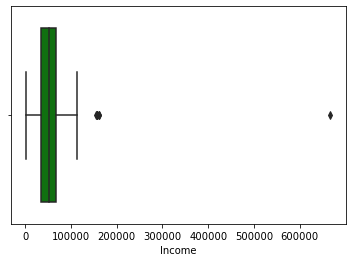

In [73]:
sns.boxplot(x = df['Income'], color='Green')
plt.show()

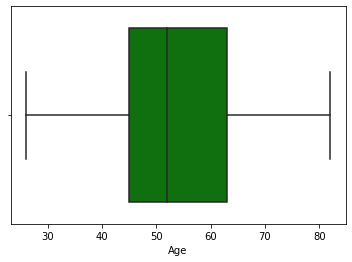

In [95]:
sns.boxplot(x = df['Age'], color = 'Green')
plt.show()

Dari Tabel di atas kita dapat melihat ada nya data outlier dari column Age dan Income. Mari kita hilangkan data outlier tersebut.

In [96]:
df = df[(df['Age']<80)]
df = df[(df['Income']<120000)]

In [97]:
df.reset_index(drop=True, inplace = True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_Revenue,Response,Family_Number,TotalHari,Age,MntTotal,NumTotalPurchases,TotalAccepted,MntAverage,NumNotDealsPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.0,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,5584.339083,1968.930095,51603.518384,0.442578,0.507036,48.975034,305.793917,26.408080,165.133908,37.765774,...,11.0,0.151158,1.949614,512.033591,53.069905,606.339537,12.567408,0.450295,inf,10.247390
std,3248.812841,11.679749,20703.663615,0.537210,0.544413,28.921749,336.984201,39.797182,217.540888,54.842393,...,0.0,0.358284,0.749025,232.625823,11.679749,601.008629,7.180138,0.894353,NaN,7.226144
min,0.000000,1943.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.0,0.000000,1.000000,0.000000,26.000000,5.000000,0.000000,0.000000,2.666667,-15.000000
25%,2814.500000,1959.000000,35187.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,11.0,0.000000,1.000000,340.000000,45.000000,69.000000,6.000000,0.000000,13.000000,3.000000
50%,5454.000000,1970.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,...,11.0,0.000000,2.000000,513.000000,52.000000,397.000000,12.000000,0.000000,29.923077,9.000000
75%,8419.000000,1977.000000,68277.500000,1.000000,1.000000,74.000000,506.000000,33.000000,232.000000,50.000000,...,11.0,0.000000,2.000000,686.000000,63.000000,1046.000000,18.000000,1.000000,49.333333,16.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,11.0,1.000000,4.000000,1063.000000,79.000000,2525.000000,32.000000,5.000000,inf,30.000000


Mari kita lihat distribusi dari umur customer: 


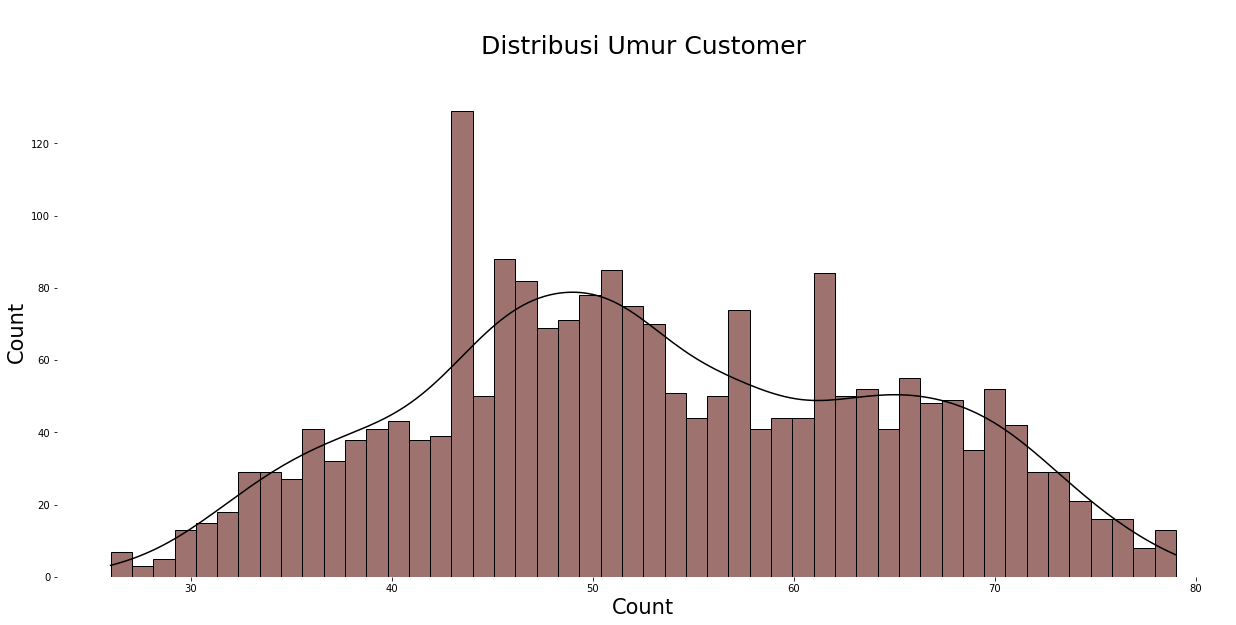

In [103]:
print(f'Mari kita lihat distribusi dari umur customer: ')
plt.subplots(figsize=(21,9))
p = sns.histplot(df['Age'], color='#9E726F', kde = True, bins=50, alpha=1,fill = True, edgecolor = 'black')
p.axes.lines[0].set_color('Black')
p.axes.set_title('\nDistribusi Umur Customer\n', fontsize = 25)
plt.ylabel('Count', fontsize = 21)
plt.xlabel('Count', fontsize = 21)
sns.despine(left=True, bottom = True)

plt.show()


Dari distribusi umur customer di atas ada beberapa informasi yang kita dapat:
1. Kita dapat lihat bahawa umur customer terdistribusi normal
2. Kebanyakan customer berumur 43 sampai 62
3. Jumlah terendah customer ada di sekitar 27-32

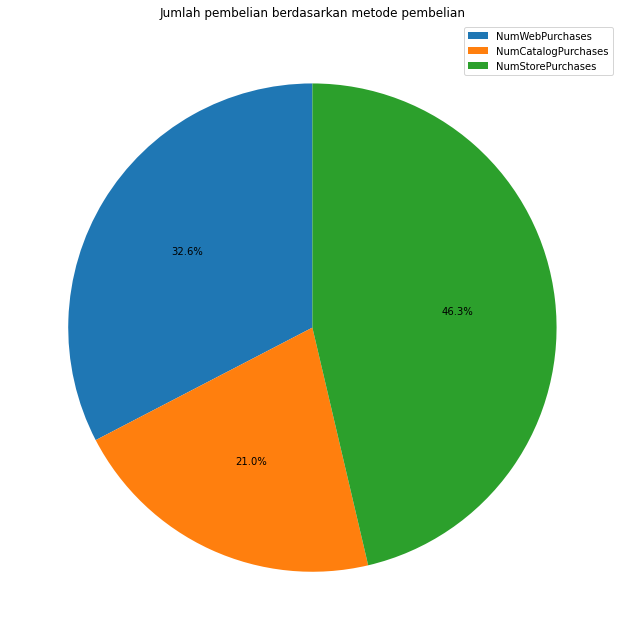

In [84]:
Pembelian = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
JumlahPembelian = [df['NumWebPurchases'].sum(), df['NumCatalogPurchases'].sum(), df['NumStorePurchases'].sum()]
plt.figure(figsize = (11,9))
plt.pie(JumlahPembelian, autopct = '%1.1f%%', startangle = 90)
plt.legend(Pembelian, loc = 'upper right')
plt.title('Jumlah pembelian berdasarkan metode pembelian')
plt.tight_layout()
plt.show();

Dari Gambar di atas dapat di lihat bahwa kebanyakan customer memilih untuk membeli barang dengan langsung mengunjungi toko dengan melalui web di peringkat kedua dan melalui katalog di peringkat ketiga

[142, 30, 163, 164, 161, 333]


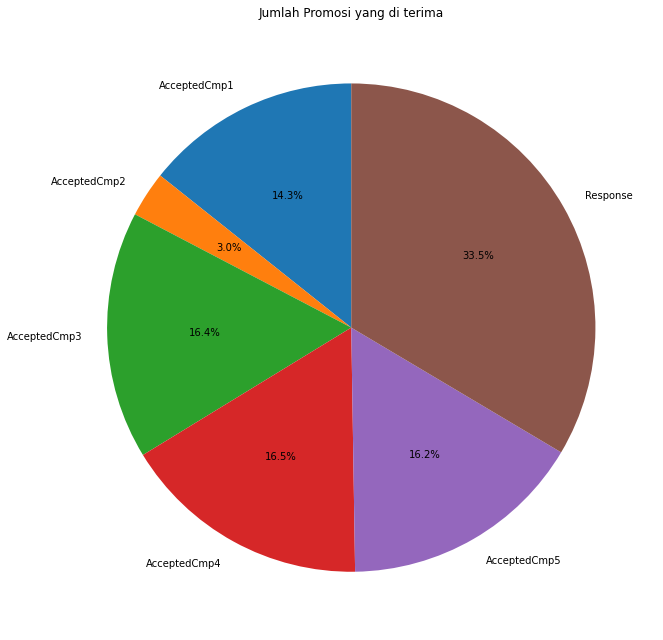

In [85]:
Promosi = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
satu = df['AcceptedCmp1'].sum()
dua = df['AcceptedCmp2'].sum()
tiga = df['AcceptedCmp3'].sum()
empat = df['AcceptedCmp4'].sum()
lima = df['AcceptedCmp5'].sum()
enam = df['Response'].sum()
JumlahPromosi = [satu,dua,tiga,empat,lima,enam]
print(JumlahPromosi)
plt.figure(figsize = (11,9))
plt.pie(JumlahPromosi, autopct = '%1.1f%%', labels = Promosi, startangle = 90)
plt.title('Jumlah Promosi yang di terima')
plt.tight_layout()
plt.show();

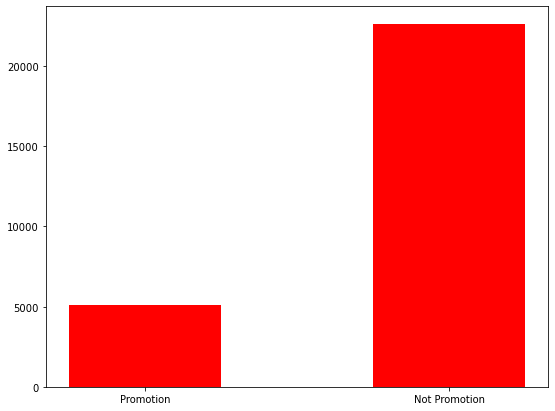

In [87]:
df['NumNotDealsPurchases'] = df['NumTotalPurchases'] - df['NumDealsPurchases']
pembelian = ['Promotion', 'Not Promotion']
size = [df['NumDealsPurchases'].sum(), df['NumNotDealsPurchases'].sum()]
plt.figure(figsize = (9,7))
plt.bar(pembelian, size, color = 'red', width = 0.5);

Dari chart di atas dapat kita lihat bahwa sepertiga dari customer kita tidak terlalu tertarik melakukan pembelian di program sales lima terawal.

Dari grafik di atas kita dapat lihat bahwa hanya 20% total pembelian yang menggunakan promosi

print(f'Mari kita lihat distribusi pendapatan dan pengeluaran customer :')
plt.subplots(figsize=(11, 9))
p = sns.histplot(df[['MntTotal','Income']],palette=["#F3AB60","#682F2F"],kde=True,bins=30,alpha=1,fill=True,edgecolor='black')
p.axes.lines[0].set_color('Red')
p.axes.lines[1].set_color('Blue')
p.axes.set_yscale("symlog")
p.axes.set_title("\nDistribusi pendapatan dan pengeluaran customer\n",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.xlabel("\nAmount",fontsize=15)
sns.despine(left=True, bottom=True)

plt.show()

Catatan untuk MntTotal merupakan total pengeluaran customer ke perusahaan. Dari grafis di atas dapat di lihat bahwa pendapatan customer berkisar di 20000 sampai 100000. Tetapi dari grafis di atas kita bisa lihat bahwa hampir seluruh customer menghabiskan hanya sedikit uang dari pendapatan mereka.

Mari kita lihat tingkat edukasi customer :


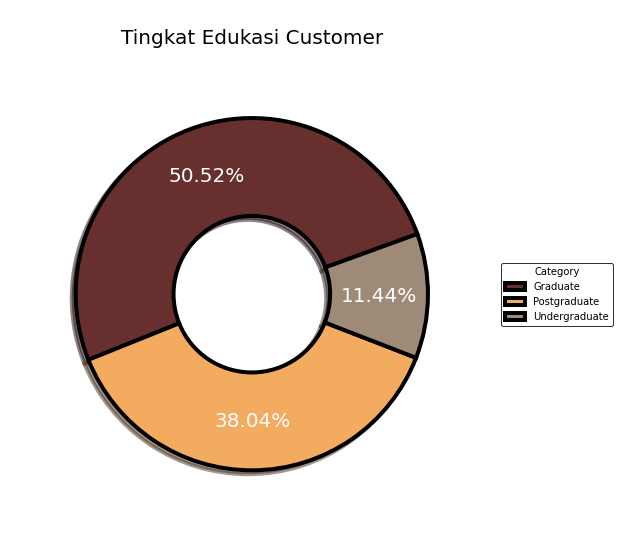

In [110]:
print(f"Mari kita lihat tingkat edukasi customer :")
plt.subplots(figsize=(11, 9))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#682F2F","#F3AB60","#9F8A78"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nTingkat Edukasi Customer",fontsize=20)
plt.show()

Customer memiliki tiga level edukasi: Undergraduate, Graduate dan Postgraduate
11.44% customer adalah undergraduate, 38.04% adalah postgraduate dan 50.52% adalah graduate

Kesimpulan dan Rekomendasi:

Dari Analisa yang telah di lakukan, Kita bisa membuat kesimpulan berikut terkait segementasi dan apa yang harus di lakukan perusahaan kedepan nya:
1. Dari distribusi umur dapat di lihat bahwa kebanyakan customer berumur 43 sampai 62 di mana yang customer termuda berumur 23 tahun
2. Dari analisa kita juga mengetahui bahwa customer cenderung lebih memilih untuk belanja langsung ke toko di bandingkan dari web atau katalog
3. Untuk promosi yang di lakukan perusahaan juga belum cukup efektif bila melihat dari data yang ada di mana dari total penjualan juga dapat di lihat masih ada lebih banyak customer yang membeli produk tanpa promosi di banding dengan yang menggunakan promosi
4. Dari analisa kita juga dapat melihat bila tingkat edukasi customer perusahaan kebanyakan sudah graduate

Rekomendasi
1. Perusahaan dapat untuk mencoba membuat promosi untuk customer yang sudah memasuki usia 40 tahun karena market perusahaan paling besar ada di range umur 40-60 tahun.
2. Perusahaan dapat membuat program promo untuk pembelian di toko karena karakteristik customer lebih condong ke pembelian langsung di toko di banding dengan metode lain nya
3. Melakukan promosi promo lebih lagi agar customer mengetahui informasi promo dan dapat meningkatkan penjualan perusahaan lebih lagi.